# Unstructured Data Analysis

In [ ]:
import warnings, platform
import matplotlib.pyplot as plt

from IPython.display import display, HTML

In [ ]:
### HTML display 조정
display(HTML("<style>.container {width :98% !important;}</style>"))

### Warning 제거
warnings.filterwarnings('ignore')

In [4]:
### 한글 폰트 설정
if platform.system()=='Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system()=='Linux':
    # !wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
    # !mv malgun.ttf /usr/share/fonts/truetype/
    import matplotlib.font_manager as fm
    fm._rebuild()
    plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False # minus 폰트 깨짐 해결

## Package load

In [1]:
from timeit import timeit

import os
import time
import datetime
import glob
import urllib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import scipy.stats as stats
import pingouin as pg

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.datasets import load_digits
from sklearn.datasets import load_wine
from sklearn.datasets import load_iris

In [5]:
### 코드 실행시간 측정
timeit("time.sleep(1)", number=2, globals=globals())

2.008180563

In [6]:
start = time.time() # 시작
time.sleep(1) # 수행시간 측정하고자 하는 코드 부분
sec = time.time() - start # 종료 - 시작 (걸린 시간)
 
times = str(datetime.timedelta(seconds=sec)) # 걸린 시간 보기좋게 바꾸기
short = times.split(".")[0] # 초 단위 까지만
print(f"{times} sec")
print(f"{short} sec")

0:00:01.000427 sec
0:00:01 sec


In [7]:
%%time
time.sleep(1)

CPU times: user 982 µs, sys: 1.29 ms, total: 2.28 ms
Wall time: 1 s


In [8]:
%%timeit
time.sleep(1)

1 s ± 1.58 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Data load

In [ ]:
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns=wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0: 'class_0', 1: 'class_1', 2: 'class_2'})

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0: 'Setosa', 1: 'Versicolour', 2: 'Virginica'})

titanic_df = pd.read_csv('./pymlrev2-main/1장/titanic_train.csv')
housing = pd.read_csv('./handson-ml2/datasets/housing/housing.csv')
diabetes = pd.read_csv('./data/diabetes.csv')
arima_data = pd.read_csv('./ADP_book_ver01/data/arima_data.csv', names=['day', 'price'])
birth_data = pd.read_csv( "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv")
ldeaths = pd.read_csv('./r_csv/datasets/ldeaths.csv').drop('Unnamed: 0', axis=1)

def parser(x):
    return datetime.datetime.strptime('190'+x, '%Y-%m')

shampoo = pd.read_csv('./data/shampoo.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)

mercari_df = pd.read_csv('./data/mercari_train.tsv', sep='\t')
y_train_df = mercari_df['price']

students = pd.DataFrame({'이름':['장화', '홍련', '콩쥐', '팥쥐', '해님', '달님'], 
                         '국어': [70, 85, None, 100, None, 85], 
                         '수학':[65, 100, 80, 95, None, 70]})

health = pd.DataFrame({'연도': [2017, 2018, 2019, 2020, 2021, 2022], 
                       '키': [160, 162, 165, None, None, 166],
                       '몸무게': [53, 52, None, 50, 51, 54],
                       '시력': [1.2, None, 1.2, 1.2, 1.1, 0.8],
                       '병결': [None, None, None, 2, None, 1]})

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']
item_df = pd.DataFrame({'item': ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})

In [9]:
boston = pd.read_csv('./data/housing.csv')

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

airline_stats = pd.read_csv("./Practical_Statictics/data/airline_stats.csv")
sp500_sym = pd.read_csv("./Practical_Statictics/data/sp500_sectors.csv")
sp500_px = pd.read_csv("./Practical_Statictics/data/sp500_data.csv.gz", index_col=0)
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]

kc_tax = pd.read_csv("./Practical_Statictics/data/kc_tax.csv.gz")
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & (kc_tax.SqFtTotLiving > 100) & (kc_tax.SqFtTotLiving < 3500), :]

fish_multi = pd.read_csv("./stats_for_python/3-3-2-fish_multi_2.csv")
cov_data = pd.read_csv("./stats_for_python/3-2-3-cov.csv")
diamond = pd.read_csv('./r_csv/ggplot2/diamonds.csv', index_col='Unnamed: 0')
chicken = pd.read_csv('./r_csv/datasets/ChickWeight.csv', index_col='Unnamed: 0')
mtcars = pd.read_csv('./r_csv/datasets/mtcars.csv', index_col='Unnamed: 0')
economics = pd.read_csv('./r_csv/ggplot2/economics.csv', index_col='Unnamed: 0')
eurodist = pd.read_csv('./r_csv/datasets/eurodist.csv', index_col='city')
usarrests = pd.read_csv('./r_csv/datasets/USArrests.csv', index_col='Unnamed: 0')
titanic = pd.read_csv('./ADP_book_ver01/data/titanic.csv')



line_sample_x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
line_sample_y = np.array([2, 3, 4, 3, 5, 4, 6, 7, 4, 8])
fish_data = np.array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

time = pd.DataFrame({"time": [7000, 6800, 6600, 6400, 6200, 6000, 5800, 5600, 5400, 5200, 5000, 4800, 4600, 4400, 4200, 4000, 3800, 3600, 3400],
                     "pop": [200, 400, 450, 500, 300, 100, 400, 700, 830, 1200, 400, 350, 200, 700, 370, 800, 200, 100, 120], 
                     "grp": [2, 5, 8, 3, 2, 2, 4, 7, 9, 4, 4, 2, 2, 7, 5, 12, 5, 4, 4],
                     "med": [1.2, 1.3, 1.2, 0.9, 2.1, 1.4, 2.9, 3.4, 2.1, 1.1, 1.2, 1.5, 1.2, 0.9, 0.5, 3.3, 2.2, 1.1, 1.2]})

score = pd.Series([1, 2, 3, 4, 10, 2, 30, 42, 31, 50, 80, 76, 90, 87, 21, 43, 65, 76, 32, 12, 34, 54])



subject = pd.DataFrame({"korean": [85, 75, 65, 78, 59, 60, 90, 100, 99, 91, 70],
                        "math": [80, 60, 75, 40, 50, 64, 70, 78, 90, 58, 50],
                        "english": [80, 70, 69, 79, 80, 95, 98, 97, 67, 80, 59],
                        "science": [90, 100, 50, 80, 67, 89 ,60, 79, 89, 80, 100]})

faithful = pd.read_csv('./r_csv/datasets/faithful.csv', index_col='Unnamed: 0')

ramen = pd.DataFrame({"면": [2, 1, 5, 2, 3, 4, 4, 1, 3, 5],
                      "그릇": [4, 5, 3, 2, 5, 3, 4, 2, 3, 5],
                      "국물": [5, 1, 4, 3, 5, 2, 3, 1, 2, 3]},
                     index=["쇠고기라면", "해물라면", "얼큰라면", "떡라면", "짬뽕라면", "만두라면", "치즈라면", "된장라면", "볶음라면", "김치라면"])

computer = pd.DataFrame({"Price": [6, 7, 6, 5, 7, 6, 5, 6, 3, 1, 2, 5, 2, 3, 1, 2], 
                         "Software": [5, 3, 4, 7, 7, 4, 7, 5, 5, 3, 6, 7, 4, 5, 6, 3],
                         "Aesthetics": [3, 2, 4, 1, 5, 2, 2, 4, 6, 7, 6, 7, 5, 6, 5, 7],
                         "Brand": [4, 2, 5, 3, 5, 3, 1, 4, 7, 5, 7, 6, 6, 5, 5, 7]})

arima_data = pd.read_csv('./ADP_book_ver01/data/arima_data.csv', names=['day', 'price'])
birth_data = pd.read_csv( "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv")
ldeaths = pd.read_csv('./r_csv/datasets/ldeaths.csv').drop('Unnamed: 0', axis=1)
text_df = pd.read_csv('./data/chatgpt.csv')

### (1) Text Process
- Text Mining의 기능: 문서 요약/분류/군집, 특성 추출
- Corpus: 텍스트 문서들의 집합. TDM(Term-Document Matrix)로 구현됨
- Cleansing, Stopword removing, Tokenization, Stemming등의 전처리 수행

#### Regular Expressions 
- [expression]: includes character
- [^expression]: not includes character
- .: exists any 1 character
- ?: decide if preceding character exists. character exists or not exists (0, 1)
- [abc] - match one of character a, b or c
    - a : OK
    - apple : OK
    - double : Not OK
- \d: match digits, same as [0-9]
- \D: match non-digits, same as [^0-9]
- \s: match whitespace character
- \S: match non-whitespace character 
- \w: match all character and digits, same as [a-zA-Z0-9]
- \W: match non-character or non-digits, same as [^a-zA-Z0-9]
- a.b : allows all character except line space between 'a' and 'b'
- a[.]b : allows only 'dot' character between 'a' and 'b'
- ca*t : allows 'a' character repeating zero time or above
- ca+t : allows 'a' character repeating one time or above
- ca?t : no 'a' character or allows repeating just one time
- ca{3}t : match if 'a' character repeats three times
- ca{2, 3}t : match if 'a' character repeats 2~3 times

In [722]:
import re

In [723]:
# select character to find
# find a or b
# search a or b from 'toast'
pattern = re.compile('[ab]')
print(pattern.search('toast'))

<re.Match object; span=(2, 3), match='a'>


In [724]:
pattern = re.compile('[^ab]') # must not 'ab'
pattern.search('abc')

<re.Match object; span=(2, 3), match='c'>

In [725]:
pattern.match("abc") # no results

In [726]:
pattern = re.compile('a.c')

pattern.search('abc')

<re.Match object; span=(0, 3), match='abc'>

In [727]:
pattern.match("cab")

In [728]:
pattern.search("abc")

<re.Match object; span=(0, 3), match='abc'>

In [729]:
pattern.search('abbc') # no results

In [730]:
pattern = re.compile('a?b')

pattern.search('ab')

<re.Match object; span=(0, 2), match='ab'>

In [731]:
pattern = re.compile('test?t')
pattern.search('test')

<re.Match object; span=(0, 4), match='test'>

In [732]:
pattern = re.compile("^data\s\w+")
pattern.match("data science")

<re.Match object; span=(0, 12), match='data science'>

In [733]:
### String replace
pattern = re.compile('(blue|white|red)')
pattern.sub('colour', 'blue socks and red shoes')

'colour socks and colour shoes'

In [734]:
pattern.sub('colour', 'blue socks and red shoes', count=1)

'colour socks and red shoes'

In [735]:
pattern = re.compile('(blue|white|red)')
pattern.subn( 'colour', 'blue socks and red shoes')

('colour socks and colour shoes', 2)

In [736]:
pattern = re.compile(r"(?P<name>\w+)\s+(?P<phone>(\d+)[-]\d+[-]\d+)")
pattern.sub("\g<phone> \g<name>", "park 010-1234-1234")

'010-1234-1234 park'

#### Pre-processing
- Cleansing
- Tokenization
- Filtering (Stopword removal)
- Stemming/Lemmatization

##### Tokenization

In [737]:
# !pip install nltk
import nltk
nltk.download('punkt')

from nltk import sent_tokenize
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /Users/a10053/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [738]:
text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample)
print(type(sentences),len(sentences))
print(sentences)

<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


In [739]:
sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


In [740]:
#여러개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화 만드는 함수 생성
def tokenize_text(text):
    # 문장별로 분리 토큰
    sentences = sent_tokenize(text)
    # 분리된 문장별 단어 토큰화
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    
    return word_tokens

#여러 문장들에 대해 문장별 단어 토큰화 수행. 
word_tokens = tokenize_text(text_sample)
print(type(word_tokens),len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


##### Stopword removal

In [741]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/a10053/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [742]:
print('영어 stop words 갯수:',len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 갯수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [743]:
stop_words = nltk.corpus.stopwords.words('english')
all_tokens = []
# 위 예제의 3개의 문장별로 얻은 word_tokens list 에 대해 stop word 제거 Loop
for sentence in word_tokens:
    filtered_words=[]
    # 개별 문장별로 tokenize된 sentence list에 대해 stop word 제거 Loop
    for word in sentence:
        #소문자로 모두 변환합니다. 
        word = word.lower()
        # tokenize 된 개별 word가 stop words 들의 단어에 포함되지 않으면 word_tokens에 추가
        if word not in stop_words:
            filtered_words.append(word)
    all_tokens.append(filtered_words)
    
print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


##### Stemming, Lemmatization

In [744]:
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/a10053/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [745]:
stemmer = LancasterStemmer()

print(stemmer.stem('working'),stemmer.stem('works'),stemmer.stem('worked'))
print(stemmer.stem('amusing'),stemmer.stem('amuses'),stemmer.stem('amused'))
print(stemmer.stem('happier'),stemmer.stem('happiest'))
print(stemmer.stem('fancier'),stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


In [746]:
lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing','v'),lemma.lemmatize('amuses','v'),lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'),lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'),lemma.lemmatize('fanciest','a'))

amuse amuse amuse
happy happy
fancy fancy


In [747]:
### chatgpt sample
text_df.head()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2023-01-22 13:44:39+00:00,1617156291046133761,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,NaN,NaN,1,0,5,0,1617148639993806848,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,"[User(username='AlexandrovnaIng', id=282705900...",[],0
1,2023-01-22 13:44:49+00:00,1617156332297256961,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0,0,2,0,1617156332297256961,"<a href=""http://twitter.com/download/android"" ...",NaN,https://twitter.com/agadmator/status/161715501...,NaN,[],0
2,2023-01-22 13:45:03+00:00,1617156389217894400,ChatGPT runs 10K Nvidia training GPUs with pot...,FierceElectron,https://twitter.com/FierceElectron/status/1617...,https://twitter.com/FierceElectron,['https://www.fierceelectronics.com/sensors/ch...,['https://t.co/Uhq62t0Uw4'],0,0,0,0,1617156389217894400,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,[],0
3,2023-01-22 13:45:04+00:00,1617156393898745858,@SWENGDAD There is repetitive work in every jo...,xlr8harder,https://twitter.com/xlr8harder/status/16171563...,https://twitter.com/xlr8harder,NaN,NaN,1,0,3,0,1617149595901104130,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,"[User(username='SWENGDAD', id=1460452950875193...",[],0
4,2023-01-22 13:45:06+00:00,1617156404137295878,I created a fictional jewelry brand using Chat...,Kosuke_dazo,https://twitter.com/Kosuke_dazo/status/1617156...,https://twitter.com/Kosuke_dazo,['https://oriori.my.canva.site/'],['https://t.co/gtWdNZ0laM'],0,1,2,1,1617156404137295878,"<a href=""http://twitter.com/download/iphone"" r...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,"['#ChatGPT', '#midjourney']",2


In [748]:
text = text_df.Text
text

0        @AlexandrovnaIng Prohibition of ChatGPT has be...
1        Bow down to chatGPT 🫡..... https://t.co/ENTSzi...
2        ChatGPT runs 10K Nvidia training GPUs with pot...
3        @SWENGDAD There is repetitive work in every jo...
4        I created a fictional jewelry brand using Chat...
                               ...                        
32071    I joined the @aipadtech x @moonsalecom exclusi...
32072    @iamjohnoliver I think ChatGPT is taking the p...
32073    Digital Marketers adopt new skills. Artificial...
32074    Remember when @Twitter was down a lot in the e...
32075    Portland Shop Uses ChatGPT To Tell Family Stor...
Name: Text, Length: 32076, dtype: object

In [749]:
### regex 사용 치환
text = text.str.replace(r'@*', '')
text = text.str.replace(r'https://*', '')
text = text.str.replace(r'http://*', '')

### 문장 부호 제거
text = text.str.replace(r'[^\w\s]+', '')

### 소문자 변환
text = text.str.lower()

In [750]:
from nltk.stem import PorterStemmer

In [751]:
### Tokenizing, Stopword removing & stemming
stop_words = set(nltk.corpus.stopwords.words('english')) 
stemmer = PorterStemmer()

In [752]:
for i in text.index:
    word_tokens = word_tokenize(text[i])

    result = []
    for w in word_tokens: 
        if w not in stop_words: 
            result.append(w) 
            
    text[i] = ' '.join([stemmer.stem(word) for word in word_tokens])

In [753]:
text.head()

0    alexandrovna prohibit of chatgpt ha been ad to...
1                    bow down to chatgpt tcoentszi2aq9
2    chatgpt run 10k nvidia train gpu with potenti ...
3    swengdad there is repetit work in everi job th...
4    i creat a fiction jewelri brand use chatgpt an...
Name: Text, dtype: object

##### Sparse matrix
- COO 형식: 0이 아닌 데이터만 별도의 배열에 저장하고, 행과 열의 위치를 별도의 배열로 저장
- CSR 형식: 행 위치 배열 내에 있는 고유한 값의 시작 위치만 위치 배열로 저장 -> 메모리 사용이 적고 빠른 연산
- 희소 행렬 연산이 효율적인 ML models: Logistic Regression, Linear SVM, Naive Bayes

In [754]:
from scipy import sparse

In [755]:
dense = np.array([[3, 0, 1], [0, 2, 0]])

In [756]:
# 0 이 아닌 데이터 추출
data = np.array([3, 1, 2])

# 행 위치와 열 위치를 각각 array로 생성 
row_pos = np.array([0, 0, 1])
col_pos = np.array([0, 2, 1])

# sparse 패키지의 coo_matrix를 이용하여 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos,col_pos)))

In [757]:
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

In [758]:
dense2 = np.array([[0, 0, 1, 0, 0, 5],
                   [1, 4, 0, 3, 2, 5],
                   [0, 6, 0, 3, 0, 0],
                   [2, 0, 0, 0, 0, 0],
                   [0, 0, 0, 7, 0, 8],
                   [1, 0, 0, 0, 0, 0]])

# 0 이 아닌 데이터 추출
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])

# 행 위치와 열 위치를 각각 array로 생성 
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

# COO 형식으로 변환 
sparse_coo = sparse.coo_matrix((data2, (row_pos, col_pos)))

# 행 위치 배열의 고유한 값들의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])

# CSR 형식으로 변환 
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [759]:
dense2 = np.array([[0, 0, 1, 0, 0, 5],
                   [1, 4, 0, 3, 2, 5],
                   [0, 6, 0, 3, 0, 0],
                   [2, 0, 0, 0, 0, 0],
                   [0, 0, 0, 7, 0, 8],
                   [1, 0, 0, 0, 0, 0]])

coo = sparse.coo_matrix(dense2)
csr = sparse.csr_matrix(dense2)

##### Bag of Words – BOW
- 문서가 가지는 모든 단어를 한데 모아놓고 (순서 무시), 일괄적으로 빈도 부여
- 구축이 빠르나, 문맥 의미 반영이 부족하고 희소 행렬 문제가 발생함
- Feature Vectorization: CSR 형식
    - CountVectorizer
    - TfidfVectorizer

In [760]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [761]:
### CountVectorizer
# 단어빈도수 세고, matrix 형태로 만들어주기
cv = CountVectorizer(max_features=500, stop_words='english')
tdm = cv.fit_transform(text) # tdm 완성
tdm.shape

(32076, 500)

In [762]:
doc = tdm[0].toarray()
doc

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [763]:
# 단어 목록 확인하기
words = cv.get_feature_names()
print(words[:10])

# 빈도수 확인하기
count = tdm.sum(axis=0)
print(count)

['10', '100', '12', '20', '2023', '42', 'abil', 'abl', 'academ', 'access']
[[  697   139   138   193   378   339   225   354   152   551   177   168
    138   419   223   197   135   249   149   164  7566   227   569   138
    285   291  1125   143   696   467   250  1241   269   258   254   336
    210   168   486   727   621  2219   139   147   302   163   284   237
    133   241   241   175   358   235   542   375   406   228   483   143
    799   394   960   160   156   254   322   485   144   179   161   393
    133   864   132   226   191   309   172   155   743  2710   893 32334
    150   291   228   488   184   155   165  1044   139   708   172   213
    519   228   330   197   255   181   729   142   393   176   180   211
    210   266  1011   244   694   242   284   183   192   373   639   610
    305   186   221   655   557   261   381   204   273   173   672   400
    384  1036   141   161   171   878   190   357   160   339   138   252
    548   351   154   327   345   279

In [764]:
word_count = list(zip(words, count.flat))
word_count[:10]

[('10', 697),
 ('100', 139),
 ('12', 138),
 ('20', 193),
 ('2023', 378),
 ('42', 339),
 ('abil', 225),
 ('abl', 354),
 ('academ', 152),
 ('access', 551)]

In [765]:
len(words)

500

In [766]:
### TfidfVectorizer
tf_idf = TfidfVectorizer(max_features=500, stop_words='english')
tdm_tfidf = tf_idf.fit_transform(text)
tdm_tfidf[0].toarray()[0][:100]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.61191639,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

#### WordCloud

In [767]:
# !pip install wordcloud
from wordcloud import WordCloud

In [768]:
wc = WordCloud(background_color='White', width=400, height=300)

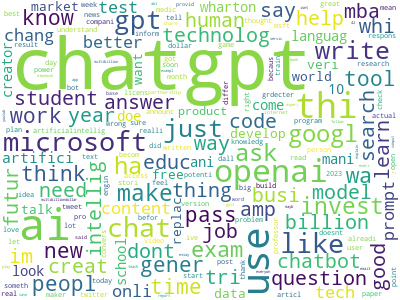

In [769]:
cloud = wc.fit_words(dict(word_count))
cloud.to_image()

#### Associations: Co-occurance

In [770]:
word_to_find = 'chatgpt'
co_occurance_dict = dict()
for i in range(tdm.shape[0]):
    if tdm[i].toarray()[0][words.index(word_to_find)] !=0:
        co_words = [words[word_index] for word_index in np.where(tdm[i].toarray()[0]==1)[0]]
        try:
            co_words.remove(word_to_find)
        except ValueError:
            pass
        
        for word in co_words:
            if word==word_to_find:
                continue
            try:
                co_occurance_dict[word] += 1
            except KeyError:
                co_occurance_dict[word] = 1

In [771]:
asso_value = 0.05
for key in co_occurance_dict.keys():
    if co_occurance_dict[key]/tdm.shape[0] >= asso_value:
        print(key, ':', co_occurance_dict[key]/tdm.shape[0])

ha : 0.055773787255268735
use : 0.12052625015587978
ai : 0.1498940017458536
write : 0.05661553809701958
openai : 0.0876044394562913
just : 0.06210250654695099
ask : 0.05605437086918568
like : 0.0652201022571393
thi : 0.10783763561541339
microsoft : 0.05705200149644594


#### Sentiment Analysis (Unsupervised)

In [772]:
nltk.download('wordnet')
nltk.download('sentiwordnet')
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn

[nltk_data] Downloading package wordnet to /Users/a10053/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /Users/a10053/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


In [773]:
### WordNet Synset과 SentiWordNet SentiSynset 클래스의 이해
term = 'present'

# 'present'라는 단어로 wordnet의 synsets 생성. 
synsets = wn.synsets(term)
print('synsets() 반환 type :', type(synsets))
print('synsets() 반환 값 갯수:', len(synsets))
print('synsets() 반환 값 :', synsets)

synsets() 반환 type : <class 'list'>
synsets() 반환 값 갯수: 18
synsets() 반환 값 : [Synset('present.n.01'), Synset('present.n.02'), Synset('present.n.03'), Synset('show.v.01'), Synset('present.v.02'), Synset('stage.v.01'), Synset('present.v.04'), Synset('present.v.05'), Synset('award.v.01'), Synset('give.v.08'), Synset('deliver.v.01'), Synset('introduce.v.01'), Synset('portray.v.04'), Synset('confront.v.03'), Synset('present.v.12'), Synset('salute.v.06'), Synset('present.a.01'), Synset('present.a.02')]


In [774]:
for synset in synsets :
    print('##### Synset name : ', synset.name(),'#####')
    print('POS :',synset.lexname())
    print('Definition:',synset.definition())
    print('Lemmas:',synset.lemma_names())

##### Synset name :  present.n.01 #####
POS : noun.time
Definition: the period of time that is happening now; any continuous stretch of time including the moment of speech
Lemmas: ['present', 'nowadays']
##### Synset name :  present.n.02 #####
POS : noun.possession
Definition: something presented as a gift
Lemmas: ['present']
##### Synset name :  present.n.03 #####
POS : noun.communication
Definition: a verb tense that expresses actions or states at the time of speaking
Lemmas: ['present', 'present_tense']
##### Synset name :  show.v.01 #####
POS : verb.perception
Definition: give an exhibition of to an interested audience
Lemmas: ['show', 'demo', 'exhibit', 'present', 'demonstrate']
##### Synset name :  present.v.02 #####
POS : verb.communication
Definition: bring forward and present to the mind
Lemmas: ['present', 'represent', 'lay_out']
##### Synset name :  stage.v.01 #####
POS : verb.creation
Definition: perform (a play), especially on a stage
Lemmas: ['stage', 'present', 'represen

In [775]:
# synset 객체를 단어별로 생성합니다. 
tree = wn.synset('tree.n.01')
lion = wn.synset('lion.n.01')
tiger = wn.synset('tiger.n.02')
cat = wn.synset('cat.n.01')
dog = wn.synset('dog.n.01')

entities = [tree , lion , tiger , cat , dog]
similarities = []
entity_names = [ entity.name().split('.')[0] for entity in entities]

# 단어별 synset 들을 iteration 하면서 다른 단어들의 synset과 유사도를 측정합니다. 
for entity in entities:
    similarity = [ round(entity.path_similarity(compared_entity), 2)  for compared_entity in entities ]
    similarities.append(similarity)
    
# 개별 단어별 synset과 다른 단어의 synset과의 유사도를 DataFrame형태로 저장합니다.  
similarity_df = pd.DataFrame(similarities , columns=entity_names,index=entity_names)
similarity_df

,tree,lion,tiger,cat,dog
tree,1.00,0.07,0.07,0.08,0.12
lion,0.07,1.00,0.33,0.25,0.17
tiger,0.07,0.33,1.00,0.25,0.17
cat,0.08,0.25,0.25,1.00,0.20
dog,0.12,0.17,0.17,0.20,1.00


In [776]:
senti_synsets = list(swn.senti_synsets('slow'))
print('senti_synsets() 반환 type :', type(senti_synsets))
print('senti_synsets() 반환 값 갯수:', len(senti_synsets))
print('senti_synsets() 반환 값 :', senti_synsets)

senti_synsets() 반환 type : <class 'list'>
senti_synsets() 반환 값 갯수: 11
senti_synsets() 반환 값 : [SentiSynset('decelerate.v.01'), SentiSynset('slow.v.02'), SentiSynset('slow.v.03'), SentiSynset('slow.a.01'), SentiSynset('slow.a.02'), SentiSynset('dense.s.04'), SentiSynset('slow.a.04'), SentiSynset('boring.s.01'), SentiSynset('dull.s.08'), SentiSynset('slowly.r.01'), SentiSynset('behind.r.03')]


In [777]:
father = swn.senti_synset('father.n.01')
print('father 긍정감성 지수: ', father.pos_score())
print('father 부정감성 지수: ', father.neg_score())
print('father 객관성 지수: ', father.obj_score())

fabulous = swn.senti_synset('fabulous.a.01')
print('fabulous 긍정감성 지수: ',fabulous .pos_score())
print('fabulous 부정감성 지수: ',fabulous .neg_score())

father 긍정감성 지수:  0.0
father 부정감성 지수:  0.0
father 객관성 지수:  1.0
fabulous 긍정감성 지수:  0.875
fabulous 부정감성 지수:  0.125


In [778]:
### IMDB text - Sentiment Analysis
review_df = pd.read_csv('./data/labeledTrainData.tsv', header=0, sep="\t", quoting=3)

In [779]:
# 간단한 NTLK PennTreebank Tag를 기반으로 WordNet기반의 품사 Tag로 변환
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return 

In [780]:
from nltk.stem import WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag

def swn_polarity(text):
    # 감성 지수 초기화 
    sentiment = 0.0
    tokens_count = 0
    
    lemmatizer = WordNetLemmatizer()
    raw_sentences = sent_tokenize(text)
    # 분해된 문장별로 단어 토큰 -> 품사 태깅 후에 SentiSynset 생성 -> 감성 지수 합산 
    for raw_sentence in raw_sentences:
        # NTLK 기반의 품사 태깅 문장 추출  
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
        for word , tag in tagged_sentence:
            
            # WordNet 기반 품사 태깅과 어근 추출
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN , wn.ADJ, wn.ADV):
                continue                   
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            # 어근을 추출한 단어와 WordNet 기반 품사 태깅을 입력해 Synset 객체를 생성. 
            synsets = wn.synsets(lemma , pos=wn_tag)
            if not synsets:
                continue
            # sentiwordnet의 감성 단어 분석으로 감성 synset 추출
            # 모든 단어에 대해 긍정 감성 지수는 +로 부정 감성 지수는 -로 합산해 감성 지수 계산. 
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment += (swn_synset.pos_score() - swn_synset.neg_score())           
            tokens_count += 1
    
    if not tokens_count:
        return 0
    
    # 총 score가 0 이상일 경우 긍정(Positive) 1, 그렇지 않을 경우 부정(Negative) 0 반환
    if sentiment >= 0 :
        return 1
    
    return 0

In [781]:
### Sentiwordnet 적용
review_df['preds'] = review_df['review'].apply(lambda x: swn_polarity(x))
y_target = review_df['sentiment'].values
preds = review_df['preds'].values

In [782]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score 
from sklearn.metrics import recall_score, f1_score, roc_auc_score

In [783]:
# 높은 성능은 아님
print(confusion_matrix(y_target, preds))
print("정확도:", np.round(accuracy_score(y_target , preds), 4))
print("정밀도:", np.round(precision_score(y_target , preds), 4))
print("재현율:", np.round(recall_score(y_target, preds), 4))

[[7649 4851]
 [3578 8922]]
정확도: 0.6628
정밀도: 0.6478
재현율: 0.7138


In [784]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/a10053/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [785]:
senti_analyzer = SentimentIntensityAnalyzer()
senti_scores = senti_analyzer.polarity_scores(review_df['review'][0])
print(senti_scores)

{'neg': 0.13, 'neu': 0.744, 'pos': 0.126, 'compound': -0.8278}


In [786]:
def vader_polarity(review, threshold=0.1):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    
    # compound 값에 기반하여 threshold 입력값보다 크면 1, 그렇지 않으면 0을 반환 
    agg_score = scores['compound']
    final_sentiment = 1 if agg_score >= threshold else 0
    return final_sentiment

In [787]:
### VADER 적용
# apply lambda 식을 이용하여 레코드별로 vader_polarity( )를 수행하고 결과를 'vader_preds'에 저장
review_df['vader_preds'] = review_df['review'].apply(lambda x : vader_polarity(x, 0.1))
y_target = review_df['sentiment'].values
vader_preds = review_df['vader_preds'].values

print(confusion_matrix(y_target, vader_preds))
print("정확도:", np.round(accuracy_score(y_target, vader_preds), 4))
print("정밀도:", np.round(precision_score(y_target, vader_preds), 4))
print("재현율:", np.round(recall_score(y_target, vader_preds), 4))

[[ 6819  5681]
 [ 1936 10564]]
정확도: 0.6953
정밀도: 0.6503
재현율: 0.8451


#### Topic Modeling
- 문서 집합에 숨어 있는 주제를 찾아내는 것
- 중심 단어는 함축적으로 추출
- 주요 기법
    - LSA (Latent Semantic Analysis): TruncatedSVD 이용
    - LDA (Latent Dirichlet Allocation): LSA에서 토픽 모델링으로 발달된 형태

In [788]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [789]:
# 모터사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 의학, 우주 주제를 추출. 
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med']

# 위에서 cats 변수로 기재된 category만 추출. featch_20newsgroups( )의 categories에 cats 입력
news_df = fetch_20newsgroups(subset='all',remove=('headers', 'footers', 'quotes'), categories=cats, random_state=0)

#LDA는 Count 기반의 Vectorizer만 적용합니다.  
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english', ngram_range=(1, 2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


In [790]:
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

In [791]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

In [792]:
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #',topic_index)

        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array index를 반환. 
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:no_top_words]
        
        # top_indexes대상인 index별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])                
        print(feature_concat)

# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names()를 통해 추출
feature_names = count_vect.get_feature_names()

# Topic별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


#### Document Clustering
- 비슷한 텍스트 구성의 문서를 Clustering

In [793]:
pd.set_option('display.max_colwidth', 700)

path = r'./data/topics'
# path로 지정한 디렉터리 밑에 있는 모든 .data 파일들의 파일명을 리스트로 취합
all_files = glob.glob(os.path.join(path, "*.data"))    
filename_list = []
opinion_text = []

# 개별 파일들의 파일명은 filename_list 리스트로 취합, 
# 개별 파일들의 파일 내용은 DataFrame 로딩 후 다시 string으로 변환하여 opinion_text 리스트로 취합 
for file_ in all_files:
    # 개별 파일을 읽어서 DataFrame으로 생성 
    df = pd.read_table(file_,index_col=None, header=0, encoding='latin1')
    
    # 절대경로로 주어진 file 명을 가공. 만일 Linux에서 수행시에는 아래 \\를 / 변경. 
    # 맨 마지막 .data 확장자도 제거
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]

    # 파일명 리스트와 파일 내용 리스트에 파일명과 파일 내용을 추가. 
    filename_list.append(filename)
    opinion_text.append(df.to_string())

# 파일명 리스트와 파일 내용 리스트를  DataFrame으로 생성
document_df = pd.DataFrame({'filename': filename_list, 'opinion_text': opinion_text})
document_df.head()

,filename,opinion_text
0,,short battery life I moved up from an 8gb .\n0 I love this ipod except for the battery life .\n1 ...
1,,Ride seems comfortable and gas mileage fairly good averaging 26 city and 30 open road .\n0 ...
2,,"We arrived at 23,30 hours and they could not recommend a restaurant so we decided to go to Tesco, with very limited choices but when you are hingry you do not careNext day they rang the bell at 8,00 hours to clean the room, not being very nice being waken up so earlyEvery day they gave u..."
3,,"Great location for tube and we crammed in a fair amount of sightseeing in a short time .\n0 All in all, a normal chain hotel on a nice lo..."
4,,Staff are friendl...


In [794]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

In [795]:
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

# 입력으로 들어온 token단어들에 대해서 lemmatization 어근 변환. 
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# TfidfVectorizer 객체 생성 시 tokenizer인자로 해당 함수를 설정하여 lemmatization 적용
# 입력으로 문장을 받아서 stop words 제거-> 소문자 변환 -> 단어 토큰화 -> lemmatization 어근 변환. 
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [796]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [797]:
# Stemming과 Lemmatization 같은 어근 변환은 TfidfVectorizer에서 직접 지원하진 않으나 tokenizer 파라미터에 커스텀 어근 변환 함수를 적용하여 어근 변환을 수행할 수 있음
# TfidfVectorizer 생성자의 tokenizer인자로 위에서 생성 LemNormalize 함수 설정.
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english', ngram_range=(1, 2), min_df=0.05, max_df=0.85)

#opinion_text 컬럼값으로 feature vectorization 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

In [798]:
# 5개 집합으로 군집화 수행. 예제를 위해 동일한 클러스터링 결과 도출용 random_state=0 
km_cluster = KMeans(n_clusters=5, max_iter=1000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

In [799]:
document_df['cluster_label'] = cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,,short battery life I moved up from an 8gb .\n0 I love this ipod except for the battery life .\n1 ...,3
1,,Ride seems comfortable and gas mileage fairly good averaging 26 city and 30 open road .\n0 ...,2
2,,"We arrived at 23,30 hours and they could not recommend a restaurant so we decided to go to Tesco, with very limited choices but when you are hingry you do not careNext day they rang the bell at 8,00 hours to clean the room, not being very nice being waken up so earlyEvery day they gave u...",0
3,,"Great location for tube and we crammed in a fair amount of sightseeing in a short time .\n0 All in all, a normal chain hotel on a nice lo...",0
4,,Staff are friendl...,0


In [800]:
document_df[document_df['cluster_label']==0].sort_values(by='filename')

,filename,opinion_text,cluster_label
2,,"We arrived at 23,30 hours and they could not recommend a restaurant so we decided to go to Tesco, with very limited choices but when you are hingry you do not careNext day they rang the bell at 8,00 hours to clean the room, not being very nice being waken up so earlyEvery day they gave u...",0
3,,"Great location for tube and we crammed in a fair amount of sightseeing in a short time .\n0 All in all, a normal chain hotel on a nice lo...",0
4,,Staff are friendl...,0
13,,Mediocre room and service for a very extravagant price .\n0 ...,0
16,,"Both of us having worked in tourism for over 14 years were very disappointed at the level of service provided by this gentleman .\n0 The service was good, very friendly staff and we loved the free wine reception each night .\n1 ...",0
17,,The room was packed to capacity with queues at the food buffets .\n0 The over zealous staff cleared our unfinished drinks while we were collecting cooked food and movement around the room with plates was difficult in the crowded circumstances .\n1 ...,0
20,,"The staff at Swissotel were not particularly nice .\n0 Each time I waited at the counter for staff for several minutes and then was waved to the desk upon my turn with no hello or anything, or apology for waiting in line .\n1 ...",0
27,,"not customer, oriented hotelvery low service levelboor reception\n0 The room was quiet, clean, the bed and pillows were comfortable, and the serv...",0
28,,"All in all, a normal chain hotel on a nice location , I will be back if I do not find anthing closer to Picadilly for a better price .\n0 ...",0
30,,"The Swissotel is one of our favorite hotels in Chicago and the corner rooms have the most fantastic views in the city .\n0 The rooms look like they were just remodled and upgraded, there was an HD TV and a nice iHome docking station to put my iPod so I could set the alarm to wake up with my music instead of the radio .\n1 ...",0


In [801]:
document_df[document_df['cluster_label']==1].sort_values(by='filename')

,filename,opinion_text,cluster_label
5,,The voice prompts and maps are wonderful especially when driving after dark .\n0 I also thought the the voice prompts of the 750 where more pleasant sounding than the 255w's .\n1 ...,1
6,,Another feature on the 255w is a display of the posted speed limit on the road which you are currently on right above your current displayed speed .\n0 I found myself not even looking at my car speedometer as I could easily see my current speed and the speed limit of my route at a glance .\n1 ...,1
7,,"A few other things I'd like to point out is that you must push the micro, sized right angle end of the ac adapter until it snaps in place or the battery may not charge .\n0 The full size right shift k...",1
8,,It is easy to read and when touching the screen it works great !\n0 and zoom out buttons on the 255w to the same side of the screen which makes it a bit easier .\n1 ...,1
10,,"It's fast to acquire satellites .\n0 If you've ever had a Brand X GPS take you on some strange route that adds 20 minutes to your trip, has you turn the wrong way down a one way road, tell you to turn AFTER you've passed the street, frequently loses the satellite signal, or has old maps missing streets, you know how important this stuff is .\n1 ...",1
12,,", I think the new keyboard rivals the great hp mini keyboards .\n0 Since the battery life difference is minimum, the only reason to upgrade would be to get the better keyboard .\n1 The keyboard is now as good as t...",1
14,,"I bought the 8, gig Ipod Nano that has the built, in video camera .\n0 Itunes has an on, line store, where you may purchase and download music and videos which will install onto the ipod .\n1 ...",1
19,,"Another thing to consider was that I paid $50 less for the 750 and it came with the FM transmitter cable and a USB cord to connect it to your computer for updates and downloads .\n0 update and reroute much _more_ quickly than my other GPS .\n1 UPDATE ON THIS , It finally turned out that to see the elevation contours at lowe...",1
21,,"I had to uninstall anti, virus and selected other programs, some of which did not have listings in the Programs and Features Control Panel section .\n0 This review briefly touches upon some of the key features and enhancements of Microsoft's latest OS .\n1 ...",1
25,,"As always, the video screen is sharp and bright .\n0 2, inch screen and a glossy, polished aluminum finish that one CNET editor described as looking like a Christmas tree ornament .\n1 ...",1


In [802]:
document_df[document_df['cluster_label']==2].sort_values(by='filename')

,filename,opinion_text,cluster_label
1,,Ride seems comfortable and gas mileage fairly good averaging 26 city and 30 open road .\n0 ...,2
18,,"Drivers seat not comfortable, the car itself compared to other models of similar class .\n0 ...",2
22,,"First of all, the interior has way too many cheap plastic parts like the cheap plastic center piece that houses the clock .\n0 3 blown struts at 30,000 miles, interior trim coming loose and rattling squeaking, stains on paint, and bug splats taking paint off, premature uneven brake wear, on 3rd windsh...",2
23,,"After slowing down, transmission has to be kicked to speed up .\n0 ...",2
29,,"Front seats are very uncomfortable .\n0 No memory seats, no trip computer, can only display outside temp with trip odometer .\n1 ...",2
35,,"It's quiet, get good gas mileage and looks clean inside and out .\n0 The mileage is great, and I've had to get used to stopping less for gas .\n1 Thought gas ...",2
42,,I previously owned a Toyota 4Runner which had incredible build quality and reliability .\n0 I bought the Camry because of Toyota reliability and qua...,2
43,,"Ride seems comfortable and gas mileage fairly good averaging 26 city and 30 open road .\n0 Seats are fine, in fact of all the smaller sedans this is the most comfortable I found for the price as I am 6', 2 and 250# .\n1 Great gas mileage and comfortable on long trips ...",2
45,,I love the new body style and the interior is a simple pleasure except for the center dash .\n0 ...,2
47,,"Very happy with my 08 Accord, performance is quite adequate it has nice looks and is a great long, distance cruiser .\n0 6, 4, 3 eco engine has poor performance and gas mileage of 22 highway .\n1 Overall performance is good but comfort level is poor .\n2 ...",2


In [803]:
document_df[document_df['cluster_label']==3].sort_values(by='filename')

,filename,opinion_text,cluster_label
0,,short battery life I moved up from an 8gb .\n0 I love this ipod except for the battery life .\n1 ...,3
9,,"After I plugged it in to my USB hub on my computer to charge the battery the charging cord design is very clever !\n0 After you have paged tru a 500, page book one, page, at, a, time to get from Chapter 2 to Chapter 15, see how excited you are about a low battery and all the time it took to get there !\n1 ...",3
11,,"6GHz 533FSB cpu, glossy display, 3, Cell 23Wh Li, ion Battery , and a 1 .\n0 Not to mention that as of now...",3
15,,"The Eee Super Hybrid Engine utility lets users overclock or underclock their Eee PC's to boost performance or provide better battery life depending on their immediate requirements .\n0 In Super Performance mode CPU, Z shows the bus speed to increase up to 169 .\n1 One...",3
24,,headphone jack i got a clear case for it and it i got a clear case for it and it like prvents me from being able to put the jack all the way in so the sound can b messsed up or i can get it in there and its playing well them go to move or something and it slides out .\n0 Picture and sound quality are excellent for this typ of devic .\n1 ...,3


In [804]:
document_df[document_df['cluster_label']==4].sort_values(by='filename')

,filename,opinion_text,cluster_label
26,,"I thought it would be fitting to christen my Kindle with the Stephen King novella UR, so went to the Amazon site on my computer and clicked on the button to buy it .\n0 As soon as I'd clicked the button to confirm my order it appeared on my Kindle almost immediately !\n1 ...",4
36,,"It feels as easy to read as the K1 but doesn't seem any crisper to my eyes .\n0 the white is really GREY, and to avoid considerable eye, strain I had to refresh pages every other page .\n1 The dream has always been a portable electronic device that could hold a ton of reading material, automate subscriptions and fa...",4
38,,"In fact, the entire navigation structure has been completely revised , I'm still getting used to it but it's a huge step forward .\n0 ...",4
41,,"If a case was included, as with the Kindle 1, that would have been reflected in a higher price .\n0 lower overall price, with nice leather cover .\n1 ...",4
44,,"Being able to change the font sizes is awesome !\n0 For whatever reason, Amazon decided to make the Font on the Home Screen ...",4


In [805]:
# 3개의 집합으로 군집화 
km_cluster = KMeans(n_clusters=3, max_iter=1000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_

# 소속 클러스터를 cluster_label 컬럼으로 할당하고 cluster_label 값으로 정렬
document_df['cluster_label'] = cluster_label
document_df.sort_values(by='cluster_label').head()

,filename,opinion_text,cluster_label
0,,short battery life I moved up from an 8gb .\n0 I love this ipod except for the battery life .\n1 ...,0
48,,"3 quot widescreen display was a bonus .\n0 This made for smoother graphics on the 255w of the vehicle moving along displayed roads, where the 750's display was more of a jerky movement .\n1 ...",0
44,,"Being able to change the font sizes is awesome !\n0 For whatever reason, Amazon decided to make the Font on the Home Screen ...",0
41,,"If a case was included, as with the Kindle 1, that would have been reflected in a higher price .\n0 lower overall price, with nice leather cover .\n1 ...",0
40,,"Windows 7 is quite simply faster, more stable, boots faster, goes to sleep faster, comes back from sleep faster, manages your files better and on top of that it's beautiful to look at and easy to use .\n0 , faster about 20% to 30% faster at running applications than my Vista , seriously\n1 ...",0


In [806]:
### 군집 별 핵심 단어 추출
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape :', cluster_centers.shape)
print(cluster_centers)

cluster_centers shape : (3, 4611)
[[0.01005322 0.         0.         ... 0.00706287 0.         0.        ]
 [0.         0.00092551 0.         ... 0.         0.         0.        ]
 [0.         0.00099499 0.00174637 ... 0.         0.00183397 0.00144581]]


In [807]:
feature_names = tfidf_vect.get_feature_names()

cluster_details = {}
clusters_num=3
top_n_features=10

# cluster_centers array 의 값이 큰 순으로 정렬된 index 값을 반환
# 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.  
centroid_feature_ordered_ind = km_cluster.cluster_centers_.argsort()[:,::-1]
    
# 개별 군집별로 iteration하면서 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명 입력
for cluster_num in range(clusters_num):
    # 개별 군집별 정보를 담을 데이터 초기화. 
    cluster_details[cluster_num] = {}
    cluster_details[cluster_num]['cluster'] = cluster_num
        
    # cluster_centers_.argsort()[:,::-1] 로 구한 index 를 이용하여 top n 피처 단어를 구함. 
    top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
    top_features = [feature_names[ind] for ind in top_feature_indexes]
        
    # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함 
    top_feature_values = km_cluster.cluster_centers_[cluster_num, top_feature_indexes].tolist()
        
    # cluster_details 딕셔너리 객체에 개별 군집별 핵심 단어와 중심위치 상대값, 그리고 해당 파일명 입력
    cluster_details[cluster_num]['top_features'] = top_features
    cluster_details[cluster_num]['top_features_value'] = top_feature_values
    filenames = document_df[document_df['cluster_label'] == cluster_num]['filename']
    filenames = filenames.values.tolist()
    cluster_details[cluster_num]['filenames'] = filenames

for cluster_num, cluster_detail in cluster_details.items():
    print('####### Cluster {0}'.format(cluster_num))
    print('Top features:', cluster_detail['top_features'])
    print('Reviews 파일명 :',cluster_detail['filenames'][:7])
    print('==================================================')

####### Cluster 0
Top features: ['screen', 'battery', 'keyboard', 'battery life', 'life', 'kindle', 'direction', 'video', 'size', 'voice']
Reviews 파일명 : ['', '', '', '', '', '', '']
####### Cluster 1
Top features: ['interior', 'seat', 'mileage', 'comfortable', 'gas', 'gas mileage', 'transmission', 'car', 'performance', 'quality']
Reviews 파일명 : ['', '', '', '', '', '', '']
####### Cluster 2
Top features: ['room', 'hotel', 'service', 'staff', 'food', 'location', 'bathroom', 'clean', 'price', 'parking']
Reviews 파일명 : ['', '', '', '', '', '', '']


#### Document Similarty
- Cosine Similarity
    - 벡터의 방향성 비교
    - 희소 행렬 기반에서 성능이 좋음

In [808]:
def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm     
    
    return similarity

In [809]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [810]:
doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


In [811]:
# TFidfVectorizer로 transform()한 결과는 Sparse Matrix이므로 Dense Matrix로 변환. 
feature_vect_dense = feature_vect_simple.todense()

#첫번째 문장과 두번째 문장의 feature vector  추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

#첫번째 문장과 두번째 문장의 feature vector로 두개 문장의 Cosine 유사도 추출
similarity_simple = cos_similarity(vect1, vect2 )
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.402


In [812]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect1, vect3 )
print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect2, vect3 )
print('문장 2, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도: 0.404
문장 2, 문장 3 Cosine 유사도: 0.456


In [813]:
from sklearn.metrics.pairwise import cosine_similarity

In [814]:
similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


In [815]:
similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


In [816]:
similarity_simple_pair = cosine_similarity(feature_vect_simple , feature_vect_simple)
print(similarity_simple_pair)
print('shape:',similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


In [817]:
path = r'./data/topics'
all_files = glob.glob(os.path.join(path, "*.data"))     
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_,index_col=None, header=0, encoding='latin1')
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename': filename_list, 'opinion_text': opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english', ngram_range=(1,2), min_df=0.05, max_df=0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

In [818]:
# cluster_label=2인 데이터는 호텔로 클러스터링된 데이터임. DataFrame에서 해당 Index를 추출
hotel_indexes = document_df[document_df['cluster_label']==2].index
print('호텔로 클러스터링 된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 클러스터링된 데이터 중 첫번째 문서를 추출하여 파일명 표시.  
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명 ',comparison_docname,' 와 타 문서 유사도######')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력하여 호텔 클러스터링된 feature_vect 추출 
이를 이용하여 호텔로 클러스터링된 문서 중 첫번째 문서와 다른 문서간의 코사인 유사도 측정.'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]] , feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 클러스터링 된 문서들의 DataFrame Index: Int64Index([2, 3, 4, 13, 16, 17, 20, 27, 28, 30, 31, 32, 39, 46, 49, 50], dtype='int64')
##### 비교 기준 문서명    와 타 문서 유사도######
[[1.         0.19917258 0.22235374 0.37631406 0.26026786 0.15836737
  0.19544761 0.40020673 0.31124876 0.77312013 0.51442299 0.15026112
  0.16717527 0.81484367 0.11154184 0.10831277]]


#### Korean text

In [819]:
### 대통령 연설 데이터
with open('./data/president.txt') as f:
    contents = f.readlines()

for i, line in enumerate(contents):
    contents[i] = line.replace('\n', '')
    
contents = [line for line in contents if line]

In [820]:
txt = ' '.join(contents)
txt

'존경하고 사랑하는 국민 여러분, 해외 동포 여러분 2023년 희망찬 새해가 밝았습니다. 새해 복 많이 받으십시오. 지난해 세계 경제의 복합위기와 불확실성 속에서 나라 안팎으로 녹록지 않았습니다만은 국민 여러분의 땀과 의지로 극복해 나갈 수 있었습니다. 글로벌 공급망 교란으로 인한 원자재 가격의 급등과 물가 상승에 대해 세계 각국은 금리 인상 정책으로 대응해 왔습니다. 올해 세계 경제는 그 어느 때보다 경기침체의 가능성이 큽니다. 세계 경기침체의 여파가 우리 실물경제의 둔화로 이어질 수 있는 엄중한 경제 상황을 면밀하게 점검해 나가겠습니다. 물가 상승을 억제하기 위해 실시하는 불가피한 금리 인상의 조치가 우리 가계와 기업의 과도한 채무 부담으로 확대되지 않도록 선제적으로 관리해 나아가겠습니다. 복합의 위기를 수출로 돌파해야 합니다. 수출은 우리 경제의 근간이고 일자리의 원천입니다. 그러나 WTO 체제가 약화되고 보호주의가 강화되는 과정에서 안보, 경제, 기술협력 등이 패키지로 운영되고 있습니다. 우리의 수출전략은 과거와는 달라져야 합니다. 자유, 인권, 법치라는 보편적 가치를 공유하는 나라들이 경제와 산업을 통해 연대하고 있으며, 보편적 가치를 기반으로 한 연대는 지금의 외교적 현실에서 가장 전략적인 선택입니다. 모든 외교의 중심을 경제에 놓고, 수출전략을 직접 챙기겠습니다. ‘해외 수주 500억 불 프로젝트’를 가동하고, 인프라 건설, 원전, 방산 분야를 새로운 수출 동력으로 육성할 것입니다. 무역금융을 역대 최대규모인 360조 원으로 확대하고, 대한민국의 수출 영토를 전 세계로 확대해 나가기 위해 모든 정책 역량을 총동원하겠습니다. 세계사를 돌아보면 위기와 도전이 세계 경제를 휘몰아칠 때 혁신을 통해 새로운 기술과 산업을 발굴한 나라가 양질의 일자리를 창출하고, 지속 가능한 성장을 이룰 수 있었습니다. ‘기업가 정신’을 가진 미래세대가 새로운 기술과 산업에 도전하고 그 도전이 꽃피울 수 있도록 모든 지원을 아끼지 않겠습니다. IT와 바이오산업뿐 아니라 방산

In [821]:
# !pip install konlpy
from konlpy.tag import Hannanum
from konlpy.tag import Kkma
from konlpy.tag import Okt
from konlpy.tag import Komoran
from konlpy.tag import Twitter

hannanum = Hannanum()
kkma = Kkma()
okt = Okt()
komoran = Komoran()
twitter = Twitter()

In [822]:
sample = txt[:206]

print("Hannanum을 쓰면 아래와 같이 됩니다.")
print(hannanum.morphs(sample))

print("Kkma를 쓰면 아래와 같이 됩니다.")
print(kkma.morphs(sample))

print("Okt를 사용하면 아래와 같이 됩니다.")
print(okt.morphs(sample))

print("Komoran를 사용하면 아래와 같이 됩니다.")
print(komoran.morphs(sample))

print("Twitter를 사용하면 아래와 같이 됩니다.")
print(twitter.morphs(sample))

Hannanum을 쓰면 아래와 같이 됩니다.
['존경', '하고', '사랑', '하', '는', '국민', '여러분', ',', '해외', '동포', '여러분', '2023년', '희망찬', '새', '어', '하', '어', '가', '아', '밝', '아ㅂ니다', '.', '새', '어', '하', '어', '복', '많', '이', '받', '으십시오', '.', '지난해', '세계', '경제', '의', '복합위', '이', '기', '와', '불확실성', '속', '에서', '나', '아', '안팎', '으로', '녹록지', '않았습니다만', '은', '국민', '여러분', '의', '땀', '과', '의지', '로', '극복', '하', '어', '나', '아', '가', 'ㄹ', '수', '있', '었습니다', '.', '글로벌', '공급망', '교란', '으로', '인하', 'ㄴ', '원자재', '가격', '의', '급등', '과', '물', '가', '상승', '에', '대', '어', '하', '어', '세계', '각국', '은', '금리', '인상', '정책', '으로', '대응', '하', '어', '오', '아ㅂ니다', '.']
Kkma를 쓰면 아래와 같이 됩니다.
['존경', '하', '고', '사랑', '하', '는', '국민', '여러분', ',', '해외', '동포', '여러분', '2023', '년', '희망차', 'ㄴ', '새해', '가', '밝', '았', '습니다', '.', '새해', '복', '많이', '받', '으시', 'ㅂ시오', '.', '지난해', '세계', '경제', '의', '복합', '위기', '와', '불', '확실성', '속', '에서', '나라', '안팎', '으로', '녹록', '지', '않', '았', '습니다만', '은', '국민', '여러분', '의', '땀', '과', '의지', '로', '극복', '하', '어', '나가', 'ㄹ', '수', '있', '었', '습니다', '.', '글로',

In [823]:
stopwords = ['습니다', '습니다만', 'ㅂ시오', 'ㅂ니다', 'ㅂ시다']

tokenized = komoran.morphs(txt)
tokenized = [token for token in tokenized if (len(token)>2 and len(token)<5) and token not in stopwords]

In [824]:
freq_dict = dict()
for token in tokenized:
    try:
        freq_dict[token] += 1
    except KeyError:
        freq_dict[token] = 1

In [825]:
### WordCloud
wc = WordCloud(background_color='White', width=400, height=300, font_path='./malgun.ttf')

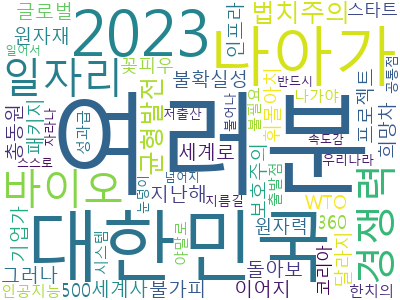

In [826]:
cloud = wc.fit_words(dict(freq_dict))
cloud.to_image()

### (2) Social Network Analysis
- 개인과 집단들 간의 관계를 노드와 링크로 모델링한 것
    - 집합론적 방법: 각 객체들의 관계를 관계 쌍으로 표현
    - 그래프 이론 방법: Node와 Link로 표현
    - 행렬 방법: 행렬로 표현. 연결되어 있으면 1, 없으면 0 -> 분석하기 편해서 자주 사용

- 중심성 척도
    - 연결정도 중심성: 한 노드에 직접적으로 연결된 노드들의 합
    - 근접 중심성: 노드 간 거리 측정. 간접적으로 연결된 모든 노드 간의 거리를 합산
    - 매개 중심성: 한 노드가 담당하는 매개/중재 역할의 정도
    - 위세 중심성: 연결된 노드의 중요성에 가중치를 둠
    

In [827]:
sample_n = 30

In [828]:
### 단어 간 연관성 분석
tdm_T = tdm.T

In [829]:
tdm_T = tdm_T.toarray()[:sample_n, :5000]
tdm_T.shape

(30, 5000)

In [830]:
tdm_T

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [831]:
# 값 출현 빈도로 전환
tdm_T = np.where(tdm_T > 0, 1, 0)

In [832]:
# 행렬곱
term_matrix = np.dot(tdm_T, tdm_T.T)

In [833]:
term_matrix_df = pd.DataFrame(term_matrix, columns=words[:sample_n], index=words[:sample_n])
term_matrix_df.head()

,10,100,12,20,2023,42,abil,abl,academ,access,...,ai,allow,alreadi,altern,alway,amaz,amp,analysi,ani,announc
10,63,4,1,2,0,2,0,0,1,0,...,7,0,1,0,0,0,1,0,0,1
100,4,30,0,0,0,1,0,0,0,0,...,5,0,1,0,1,0,3,0,0,0
12,1,0,23,0,2,0,0,0,0,1,...,9,0,0,0,2,0,1,0,0,1
20,2,0,0,21,2,0,0,2,0,0,...,6,0,0,0,2,0,0,0,1,1
2023,0,0,2,2,53,1,1,0,0,0,...,16,0,0,0,0,1,3,0,1,0


In [834]:
sources = list()
targets = list()
weights = list()

# build the graph
for i in term_matrix_df.columns:
    index = term_matrix_df.loc[:, i].index
    for j in index:
        sources.append(i)
        targets.append(j)
        weights.append(term_matrix_df.loc[j, i])

In [835]:
edges = pd.DataFrame()

edges['source'] = pd.DataFrame(sources)
edges['target'] = pd.DataFrame(targets)
edges['weight'] = pd.DataFrame(weights)

In [836]:
edges = edges[edges['weight'] > 1]
edges = edges[edges['source'] != edges['target']]

In [837]:
import networkx as nx

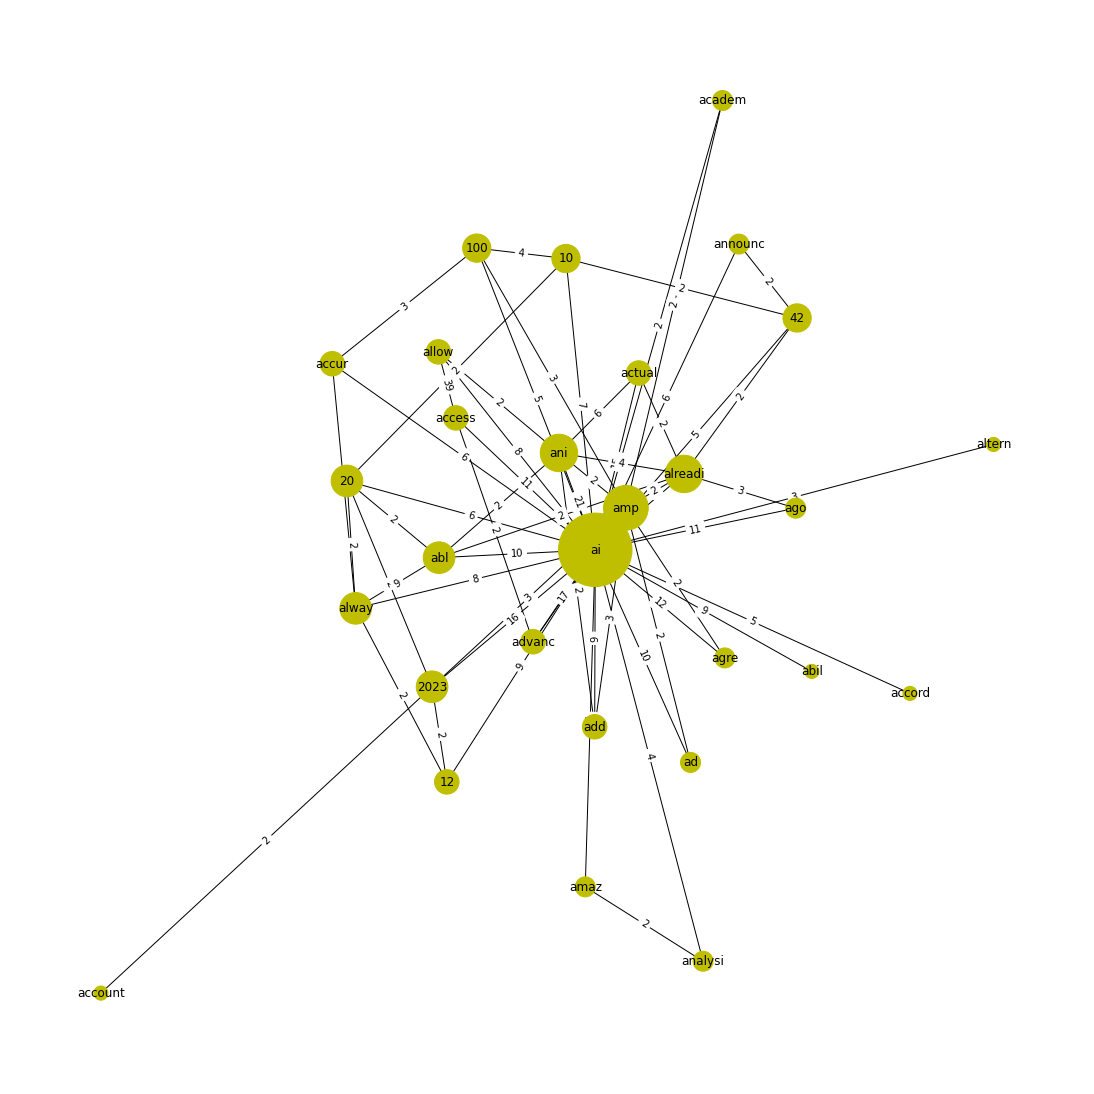

In [838]:
G = nx.from_pandas_edgelist(edges, edge_attr='weight')
# G.remove_edges_from(nx.selfloop_edges(G))

plt.figure(figsize=(15, 15))

pos = nx.spring_layout(G) # 각 노드, 엣지를 draw하기 위한 position 정보
weight = nx.get_edge_attributes(G, 'weight')
degree = nx.degree(G)

nx.draw(G, pos, with_labels=True, node_size=[v * 200 for v in dict(degree).values()], node_color='y')
nx.draw_networkx_edge_labels(G, pos, edge_labels=weight)

plt.show()

In [839]:
# node의 degree
nx.degree(G)

DegreeView({'10': 4, '100': 4, '20': 5, '42': 4, 'ai': 27, 'accur': 3, 'amp': 10, '12': 3, '2023': 5, 'alway': 5, 'abl': 5, 'account': 1, 'alreadi': 7, 'announc': 2, 'abil': 1, 'ani': 7, 'academ': 2, 'access': 3, 'advanc': 3, 'allow': 3, 'accord': 1, 'actual': 3, 'ad': 2, 'add': 3, 'ago': 2, 'agre': 2, 'altern': 1, 'amaz': 2, 'analysi': 2})

In [840]:
# 밀집도
nx.density(G)

0.15024630541871922

In [841]:
# Compute the betweenness centrality of G: bet_cen
bet_cen = nx.betweenness_centrality(G)
sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)[0:5]

# Compute the degree centrality of G: deg_cen
deg_cen = nx.degree_centrality(G)
sorted(deg_cen.items(), key=lambda x:x[1], reverse=True)[0:5]

# Compute the page rank of G: page_rank
page_rank = nx.pagerank(G)
sorted(page_rank.items(), key=lambda x:x[1], reverse=True)[0:5]

# Compute the closeness centrality of G: clos_cen
clos_cen = nx.closeness_centrality(G)
sorted(clos_cen.items(), key=lambda x:x[1], reverse=True)[0:5]

[('ai', 0.9655172413793104),
 ('amp', 0.6086956521739131),
 ('alreadi', 0.56),
 ('ani', 0.56),
 ('20', 0.5490196078431373)]

In [842]:
### Twitter connections
tw_mentioned = text_df[text_df.MentionedUsers.notna()]
tw_mentioned.shape

(12450, 19)

In [843]:
tw_data = pd.DataFrame()
tw_data['names'] = tw_mentioned['Username']
tw_data['mentions'] = tw_mentioned['MentionedUsers']

In [844]:
for i in tw_data.index:
    mention_list = list()
    for user in tw_data['mentions'][i].split(', User'):
        mention_list.append(user.split(',')[0].split('=')[1].replace("'", ''))
        
    tw_data['mentions'][i] = mention_list

In [845]:
tw_data.reset_index(inplace=True, drop=True)
tw_data

,names,mentions
0,Caput_LupinumSG,[AlexandrovnaIng]
1,xlr8harder,[SWENGDAD]
2,WesHellyar,"[Slipcatch, nickhedley]"
3,ACAPITALGROUP17,[paulgp]
4,JoycemwangiKE,[FrankDeya]
...,...,...
12445,savagesazid,"[getpeid, Irenezhao_, getpeid]"
12446,sinitzelcisi,"[AIPADTECH, moonsalecom]"
12447,khaled_awad098,"[AIPADTECH, moonsalecom]"
12448,bellia_us,[iamjohnoliver]


In [846]:
weights_dict = dict()

# build the graph
for i in tw_data.index:
    for mention in tw_data.mentions[i]:
        try:
            weights_dict[f'{mention}-{tw_data.names[i]}'] += 1
        except KeyError:
            weights_dict[f'{mention}-{tw_data.names[i]}'] = 1

In [847]:
sources = list()
targets = list()
weights = list()
for i in weights_dict.keys():
    sources.append(i.split('-')[1])
    targets.append(i.split('-')[0])
    
    weights.append(weights_dict[i])

In [848]:
edges = pd.DataFrame()

edges['source'] = pd.DataFrame(sources)
edges['target'] = pd.DataFrame(targets)
edges['weight'] = pd.DataFrame(weights)

In [849]:
edges = edges[edges['weight'] > 3]
edges

,source,target,weight
216,igblan,adrianbowyer,4
647,Omedalus,DavidRozado,4
658,robbezdjian,GRDecter,6
744,saqlainhaidar16,Charles_SEO,6
900,lisperati,shawnwillden,5
...,...,...,...
14008,Drewshearer444,EFisherWX,4
14046,WhateverCallMe,LinkedIn,5
15127,Roooaaarrr,jtrain56,4
15911,fermonte,KimZetter,4


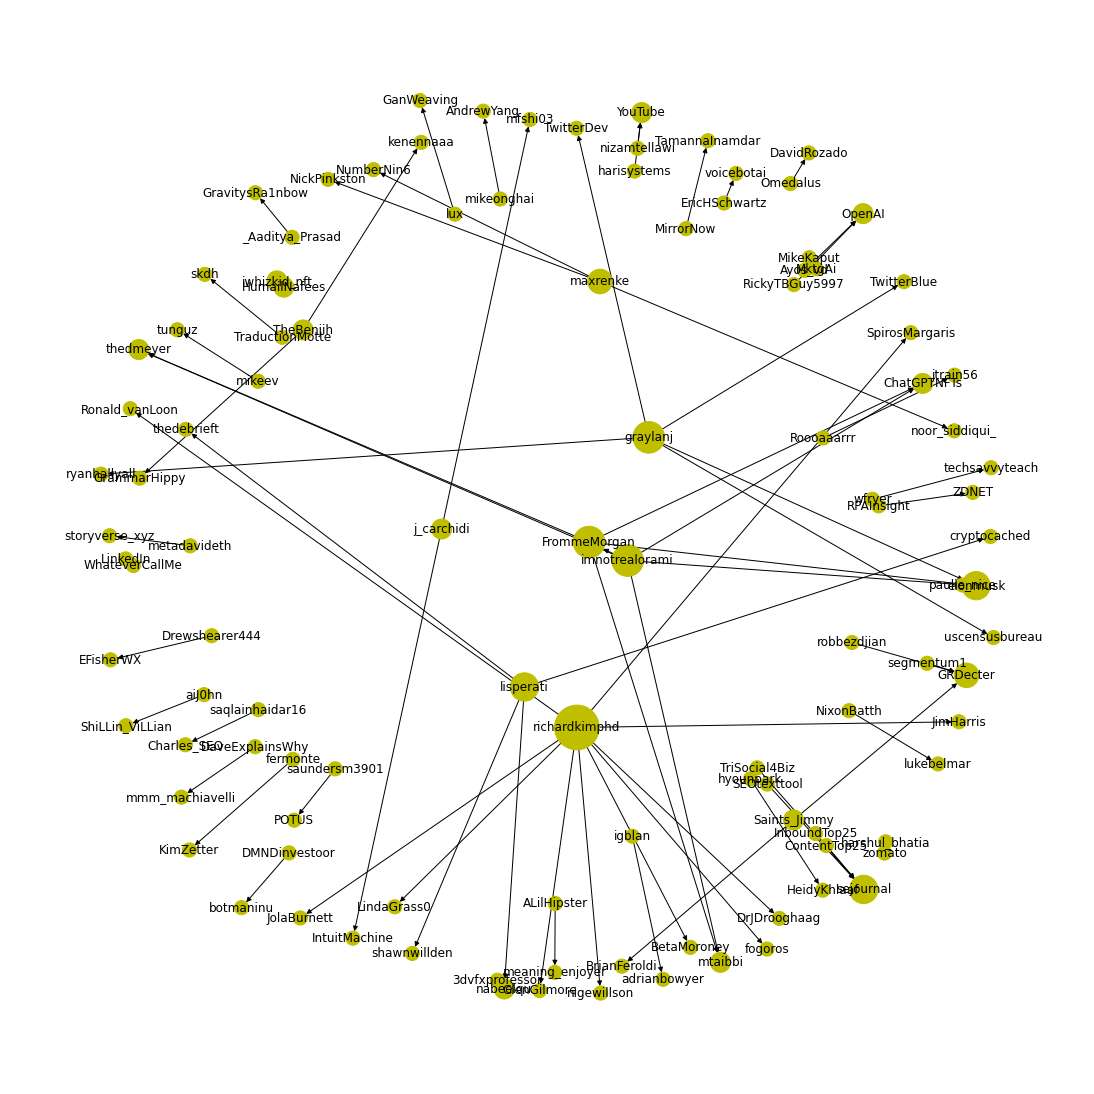

In [850]:
G = nx.DiGraph()
G = nx.from_pandas_edgelist(edges, edge_attr='weight', create_using=nx.DiGraph())
G.remove_edges_from(nx.selfloop_edges(G))

plt.figure(figsize=(15, 15))

pos = nx.spring_layout(G) # 각 노드, 엣지를 draw하기 위한 position 정보
degree = nx.degree(G)

nx.draw(G, pos, with_labels=True, node_size=[v * 200 for v in dict(degree).values()], node_color='y')
plt.show()

In [851]:
# Compute the betweenness centrality of G: bet_cen
bet_cen = nx.betweenness_centrality(G)
sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)[0:5]

# Compute the degree centrality of G: deg_cen
deg_cen = nx.degree_centrality(G)
sorted(deg_cen.items(), key=lambda x:x[1], reverse=True)[0:5]

# Compute the page rank of G: page_rank
page_rank = nx.pagerank(G)
sorted(page_rank.items(), key=lambda x:x[1], reverse=True)[0:5]

# Compute the closeness centrality of G: clos_cen
clos_cen = nx.closeness_centrality(G)
sorted(clos_cen.items(), key=lambda x:x[1], reverse=True)[0:5]

[('elonmusk', 0.037037037037037035),
 ('sejournal', 0.037037037037037035),
 ('GRDecter', 0.027777777777777776),
 ('nabeelqu', 0.018518518518518517),
 ('YouTube', 0.018518518518518517)]

In [852]:
### Grey data
ga_data = pd.read_csv('./data/ga_edgelist.csv')
ga_data.head()

,from,to
0,lexi,sloan
1,lexi,karev
2,owen,yang
3,owen,altman
4,sloan,torres


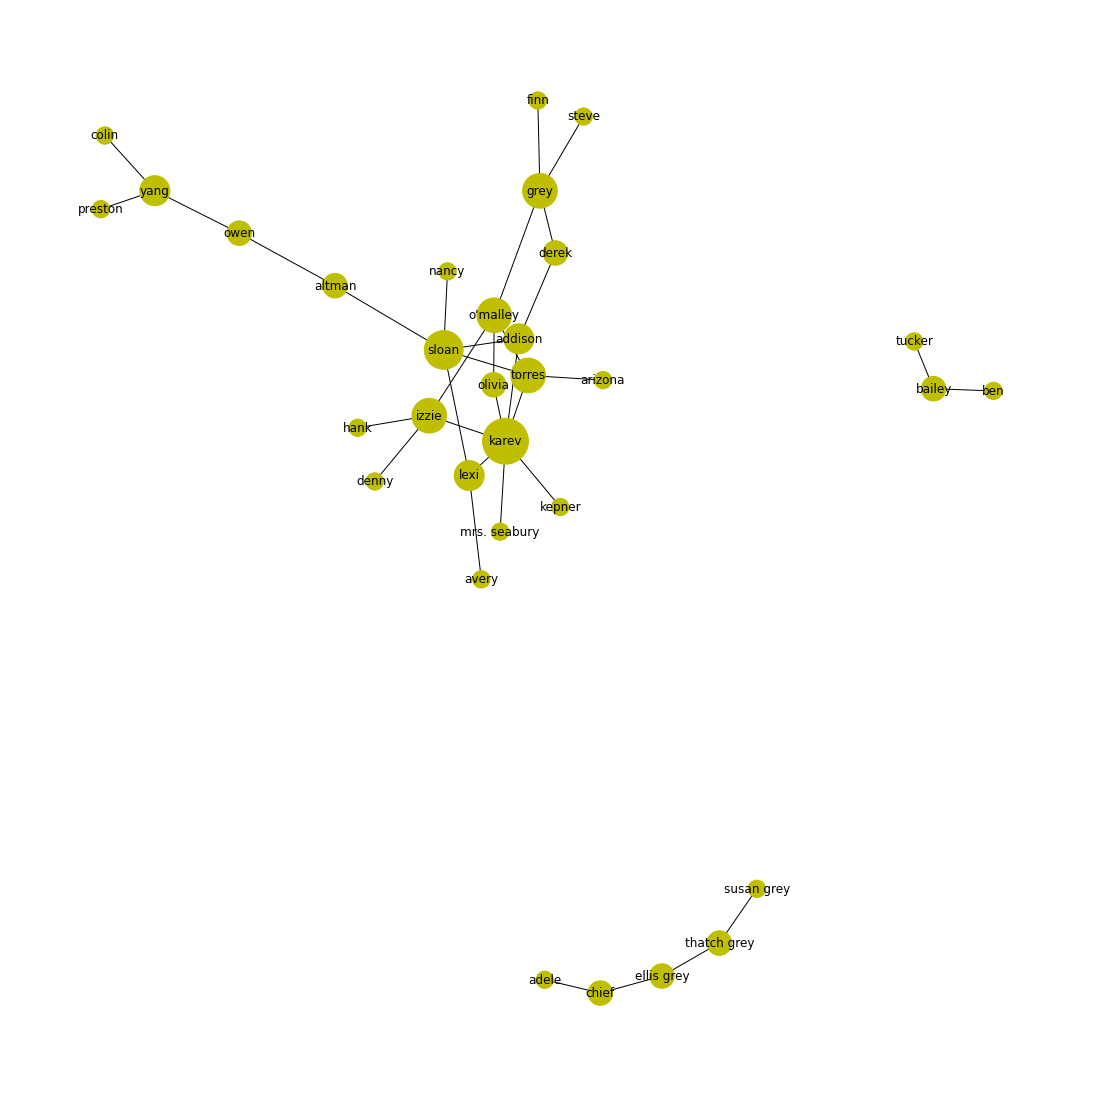

In [853]:
G = nx.DiGraph()
G = nx.from_pandas_edgelist(ga_data, source='from', target='to')

plt.figure(figsize=(15, 15))

pos = nx.spring_layout(G) # 각 노드, 엣지를 draw하기 위한 position 정보
degree = nx.degree(G)

nx.draw(G, pos, with_labels=True, node_size=[v * 300 for v in dict(degree).values()], node_color='y')
plt.show()

In [854]:
# Compute the betweenness centrality of G: bet_cen
bet_cen = nx.betweenness_centrality(G)
sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)[0:5]

# Compute the degree centrality of G: deg_cen
deg_cen = nx.degree_centrality(G)
sorted(deg_cen.items(), key=lambda x:x[1], reverse=True)[0:5]

# Compute the page rank of G: page_rank
page_rank = nx.pagerank(G)
sorted(page_rank.items(), key=lambda x:x[1], reverse=True)[0:5]

# Compute the closeness centrality of G: clos_cen
clos_cen = nx.closeness_centrality(G)
sorted(clos_cen.items(), key=lambda x:x[1], reverse=True)[0:5]

[('torres', 0.29937747594793435),
 ('sloan', 0.2892290869327502),
 ('karev', 0.2892290869327502),
 ('addison', 0.2892290869327502),
 ("o'malley", 0.2708653353814644)]